In [ ]:
pip install optbinning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.5/213.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 33.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver doe

In [ ]:
from optbinning import BinningProcess

(CVXPY) Mar 15 03:31:16 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 15 03:31:16 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.9.3963). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
client_profile_event=pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практикa_6_7/!dataпрофиль+событие.csv', sep=',', engine='c')

In [ ]:
variable_names = list(client_profile_event.loc[:, ~client_profile_event.columns.isin(['ClientID', 'Event'])])
selection_criteria = {
"iv":
{
"min": 0.02,
"max": 2.5,
"strategy": "highest",
"top": 10
},

"quality_score":
{
"min": 0.01
}
}
X = client_profile_event[variable_names]
Y = client_profile_event["Событие"].values

binning_process = BinningProcess(variable_names, selection_criteria = selection_criteria, max_n_bins = 6)

In [ ]:
binning_process.fit(X, Y)

BinningProcess(max_n_bins=6,
               selection_criteria={'iv': {'max': 2.5, 'min': 0.02,
                                          'strategy': 'highest', 'top': 10},
                                   'quality_score': {'min': 0.01}},
               variable_names=['Клиент', 'R (Давность)', 'F (Частота)',
                               'M (Сумма)', 'Разнообразие корзины',
                               'Разнообразие товарных групп',
                               'Последняя покупка', 'Визиты в выходной',
                               'Максимальный чек', 'Визит в будние',
                               'Событие'])

In [ ]:
variable_names=list(client_profile_event.iloc[:,~client_profile_event.columns.isin(['ClientID','Event'])])
X=client_profile_event[variable_names]
Y=client_profile_event['Событие'].values
selection_criteria={'iv':{'min':0.02,'max':2.5,'strategy':'highest','top':10},
'quality_score':{'min':0.01}}
binning_process=BinningProcess(variable_names, selection_criteria=selection_criteria, max_n_bins=5)
binning_process.fit(X,Y)
binning_process.summary()
#binning_process.information(print_level=2)

name        dtype   status  selected n_bins  \
0                        Клиент  categorical  OPTIMAL     False      1   
1                  R (Давность)    numerical  OPTIMAL      True      5   
2                   F (Частота)    numerical  OPTIMAL      True      5   
3                     M (Сумма)    numerical  OPTIMAL      True      5   
4          Разнообразие корзины    numerical  OPTIMAL      True      5   
5   Разнообразие товарных групп    numerical  OPTIMAL      True      5   
6             Последняя покупка    numerical  OPTIMAL      True      5   
7             Визиты в выходной    numerical  OPTIMAL      True      5   
8              Максимальный чек    numerical  OPTIMAL      True      5   
9                Визит в будние    numerical  OPTIMAL      True      5   
10                      Событие    numerical  OPTIMAL     False      1   

          iv        js      gini quality_score  
0        0.0       0.0         0           0.0  
1   1.178982  0.131301  0.550677      0.053326  
2   0.664211  0.078195  0.432607      0.604314  
3   0.458907   0.05493  0.364626       0.88525  
4   0.643198  0.075765  0.425665      0.635817  
5   0.607898  0.072321  0.418481       0.69309  
6   0.028257  0.003519  0.078819      0.044207  
7   0.447307  0.053773  0.361783      0.886249  
8   0.159358  0.019566  0.214308      0.529584  
9   0.627618  0.073982  0.422831      0.703282  
10       0.0       0.0         0           0.0

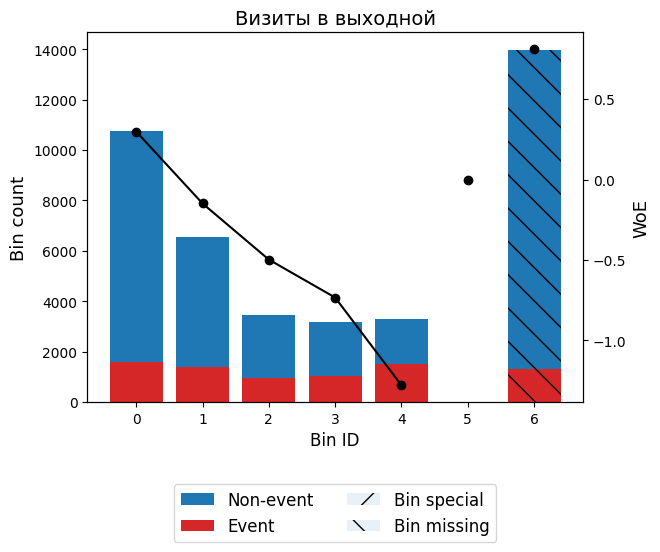

In [ ]:
optb = binning_process.get_binned_variable("Визиты в выходной")
optb.binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
import optbinning
binning_table_visit_weekend = optb.binning_table
type(binning_table_visit_weekend)
optbinning.binning.binning_statistics.BinningTable
binning_table_visit_weekend.build()

Bin  Count  Count (%)  Non-event  Event  Event rate  \
0         (-inf, 4.50)  10766   0.261336       9181   1585    0.147223   
1         [4.50, 9.50)   6554   0.159093       5161   1393    0.212542   
2        [9.50, 14.50)   3444   0.083600       2491    953    0.276713   
3       [14.50, 23.50)   3181   0.077216       2143   1038    0.326312   
4         [23.50, inf)   3284   0.079716       1789   1495    0.455238   
5              Special      0   0.000000          0      0    0.000000   
6              Missing  13967   0.339038      12657   1310    0.093793   
Totals                  41196   1.000000      33422   7774    0.188708   

             WoE        IV        JS  
0       0.298122  0.021111  0.002629  
1      -0.148759  0.003684  0.000460  
2      -0.497605  0.023913  0.002959  
3      -0.733519  0.050908  0.006225  
4      -1.278899  0.177486  0.020788  
5            0.0  0.000000  0.000000  
6       0.809754  0.170204  0.020713  
Totals            0.447307  0.053773

In [ ]:
optb = binning_process.get_binned_variable("R (Давность)")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_recency = optb.binning_table
type(binning_table_recency)
binning_table_recency.build()

In [ ]:
optb = binning_process.get_binned_variable("F (Частота)")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_frequency = optb.binning_table
type(binning_table_frequency)
binning_table_frequency.build()

In [ ]:
optb = binning_process.get_binned_variable("M (Сумма)")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_money = optb.binning_table
type(binning_table_money)
binning_table_money.build()

In [ ]:
optb = binning_process.get_binned_variable("Разнообразие корзины")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_VarOfItem = optb.binning_table
type(binning_table_VarOfItem)
binning_table_VarOfItem.build()

In [ ]:
optb = binning_process.get_binned_variable("Разнообразие товарных групп")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_VarOfItemGroup = optb.binning_table
type(binning_table_VarOfItemGroup)
binning_table_VarOfItemGroup.build()

In [ ]:
optb = binning_process.get_binned_variable("Последняя покупка")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_LastVisit = optb.binning_table
type(binning_table_LastVisit)
binning_table_LastVisit.build()

In [ ]:
optb = binning_process.get_binned_variable("Визиты в выходной")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_WeekendVisit = optb.binning_table
type(binning_table_WeekendVisit)
binning_table_WeekendVisit.build()

In [ ]:
optb = binning_process.get_binned_variable("Максимальный чек")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_MaxCheck = optb.binning_table
type(binning_table_MaxCheck)
binning_table_MaxCheck.build()

In [ ]:
optb = binning_process.get_binned_variable("Визит в будние")
optb. binning_table.build()

optb.binning_table.plot(metric="woe")

In [ ]:
binning_table_WeekdayVisit = optb.binning_table
type(binning_table_WeekdayVisit)
binning_table_WeekdayVisit.build()

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
train_data_pr_7 = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практикa_6_7/обучающая выборка_пр6-7.csv', sep=';', engine='c')

In [ ]:
test_data_pr_7 = pd.read_csv('C:/Users/avser/Desktop/ml_Serov/практикa_6_7/тестовая выборка_пр6-7.csv', sep=';', engine='c')

In [ ]:
train_data_pr_7.head()

In [ ]:
test_data_pr_7.head()

In [ ]:
train_data_pr_7['Клиент'] = train_data_pr_7['Клиент'].map(lambda x: x.lstrip('client'))

In [ ]:
train_data_pr_7['Событие'].value_counts()

In [ ]:
train_data_pr_7.Событие = train_data_pr_7.Событие.replace({ True : 1 , False : 0 })

In [ ]:
test_data_pr_7.Событие = test_data_pr_7.Событие.replace({ True : 1 , False : 0 })

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_data_pr_7, test_data_pr_7)

In [ ]:
train_data_pr_7 = train_data_pr_7.drop('Доля визитов в выходные', axis=1)
train_data_pr_7 = train_data_pr_7.drop('Доля трат в последнем визите', axis=1)
train_data_pr_7 = train_data_pr_7.drop('Клиент', axis=1)

In [ ]:
test_data_pr_7 = test_data_pr_7.drop('Доля визитов в выходные', axis=1)
test_data_pr_7 = test_data_pr_7.drop('Доля трат в последнем визите', axis=1)
test_data_pr_7 = test_data_pr_7.drop('Клиент', axis=1)

In [ ]:
train_y = train_data_pr_7['Событие']

In [ ]:
test_y = test_data_pr_7['Событие']

In [ ]:
train_data_pr_7 = train_data_pr_7.drop('Событие', axis=1)

In [ ]:
test_data_pr_7 = test_data_pr_7.drop('Событие', axis=1)

In [ ]:
log_regression = LogisticRegression()

In [ ]:
log_regression.fit(train_data_pr_7, train_y)

In [ ]:
pred_y = log_regression. predict (test_data_pr_7)

In [ ]:
y_pred_proba = log_regression. predict_proba (test_data_pr_7)[::,1]
fpr, tpr, _ = metrics. roc_curve (test_y, y_pred_proba)
auc = metrics. roc_auc_score (test_y, y_pred_proba)
plt.plot (fpr,tpr,label=" AUC= "+str(auc))
plt.legend(loc=4)
plt.show()